In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
page = requests.get('https://www.numbeo.com/cost-of-living/rankings.jsp')
soup = BeautifulSoup(page.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Rankings: Cost of Living Index,  Restaurant Prices Index, Transportation Price Index, Grocery Price Index, Local Purchasing Power Index, ... " name="description">
<script defer="" src="https://www.numbeo.com/common/numbeo_standard.js"></script>
<link href="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/themes/redmond/jquery-ui.min.css" rel="Stylesheet"/>
<link href="https://www.numbeo.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.10.2/jquery.min.js"></script>
<script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/jquery-ui.min.js"></script>
<script src="https://www.gstatic.com/charts/loader.js"></script>
<link href="https://www.numbeo.com/images/apple-touch-icon.png" rel="apple-touch-icon"/>
<script>
  if (typeof whenDocReady === "function") {
    /

In [12]:
table = soup.find('thead')
rows = table.find_all('tr')
cols = [val.get_text() for val in rows[0].find_all('th')]
print(cols)

['Rank', 'City', 'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']


In [22]:
table = soup.find('tbody')
rows = table.find_all('tr')
row_header = []
for i in range(0, len(rows)):
    row_header.append([val.get_text() for val in rows[i].find_all('td')])
row_header   

[['',
  'Zurich, Switzerland',
  '112.5',
  '68.1',
  '93.2',
  '113.9',
  '110.4',
  '167.3'],
 ['',
  'Geneva, Switzerland',
  '111.4',
  '63.7',
  '90.6',
  '113.8',
  '113.4',
  '171.0'],
 ['',
  'Basel, Switzerland',
  '110.7',
  '49.1',
  '83.9',
  '116.2',
  '108.4',
  '194.8'],
 ['',
  'Lausanne, Switzerland',
  '110.5',
  '48.3',
  '83.4',
  '110.7',
  '111.3',
  '180.4'],
 ['',
  'Lugano, Switzerland',
  '108.4',
  '41.2',
  '79.1',
  '111.0',
  '111.4',
  '159.7'],
 ['', 'Bern, Switzerland', '103.4', '43.2', '77.2', '106.0', '91.1', '186.8'],
 ['',
  'New York, NY, United States',
  '100.0',
  '100.0',
  '100.0',
  '100.0',
  '100.0',
  '100.0'],
 ['', 'Reykjavik, Iceland', '96.2', '50.5', '76.3', '102.1', '106.5', '113.1'],
 ['',
  'Honolulu, HI, United States',
  '94.4',
  '57.9',
  '78.5',
  '120.2',
  '83.7',
  '108.7'],
 ['',
  'San Francisco, CA, United States',
  '90.7',
  '78.4',
  '85.3',
  '100.1',
  '90.6',
  '171.9'],
 ['',
  'Seattle, WA, United States',
  '86.0

In [24]:
import pandas as pd

df = pd.DataFrame(columns=cols)
df

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index


In [25]:
for d in row_header:
    df.loc[len(df)] = d
df

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,,"Zurich, Switzerland",112.5,68.1,93.2,113.9,110.4,167.3
1,,"Geneva, Switzerland",111.4,63.7,90.6,113.8,113.4,171.0
2,,"Basel, Switzerland",110.7,49.1,83.9,116.2,108.4,194.8
3,,"Lausanne, Switzerland",110.5,48.3,83.4,110.7,111.3,180.4
4,,"Lugano, Switzerland",108.4,41.2,79.1,111.0,111.4,159.7
...,...,...,...,...,...,...,...,...
399,,"Surat, India",18.7,7.7,13.9,22.8,15.6,60.4
400,,"Lahore, Pakistan",18.5,3.3,11.9,16.7,16.1,29.7
401,,"Lucknow (Lakhnau), India",17.9,3.8,11.8,19.7,12.7,75.2
402,,"Indore, India",17.7,4.3,11.9,20.9,13.4,81.4


In [26]:
top = df.head(10)
top

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,,"Zurich, Switzerland",112.5,68.1,93.2,113.9,110.4,167.3
1,,"Geneva, Switzerland",111.4,63.7,90.6,113.8,113.4,171.0
2,,"Basel, Switzerland",110.7,49.1,83.9,116.2,108.4,194.8
3,,"Lausanne, Switzerland",110.5,48.3,83.4,110.7,111.3,180.4
4,,"Lugano, Switzerland",108.4,41.2,79.1,111.0,111.4,159.7
5,,"Bern, Switzerland",103.4,43.2,77.2,106.0,91.1,186.8
6,,"New York, NY, United States",100.0,100.0,100.0,100.0,100.0,100.0
7,,"Reykjavik, Iceland",96.2,50.5,76.3,102.1,106.5,113.1
8,,"Honolulu, HI, United States",94.4,57.9,78.5,120.2,83.7,108.7
9,,"San Francisco, CA, United States",90.7,78.4,85.3,100.1,90.6,171.9


In [29]:
newdf = top.iloc[:,[1, 5]]
newdf

,City,Groceries Index
0,"Zurich, Switzerland",113.9
1,"Geneva, Switzerland",113.8
2,"Basel, Switzerland",116.2
3,"Lausanne, Switzerland",110.7
4,"Lugano, Switzerland",111.0
5,"Bern, Switzerland",106.0
6,"New York, NY, United States",100.0
7,"Reykjavik, Iceland",102.1
8,"Honolulu, HI, United States",120.2
9,"San Francisco, CA, United States",100.1


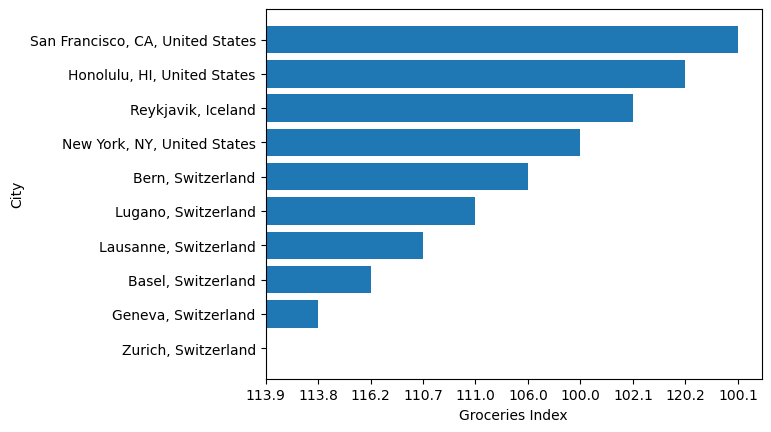

In [40]:
import matplotlib.pyplot as plt

plt.barh(newdf['City'], newdf['Groceries Index'])
plt.xlabel('Groceries Index')
plt.ylabel('City')

plt.show()